In [1]:
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')

In [2]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
dataset = dataset.rename(columns={'Genre':'Gender'})

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
dataset.shape

(200, 5)

In [8]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
dataset.duplicated().sum()

0

In [11]:
dataset.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
111,112,Female,19,63,54
144,145,Male,25,77,12
178,179,Male,59,93,14
82,83,Male,67,54,41
183,184,Female,29,98,88
33,34,Male,18,33,92
132,133,Female,25,72,34
62,63,Female,67,47,52
74,75,Male,59,54,47
14,15,Male,37,20,13


In [12]:
dataset = dataset.drop('CustomerID', axis=1)

In [13]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Data Visualizations

<ipython-input-14-a5c0ba5bcd3b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


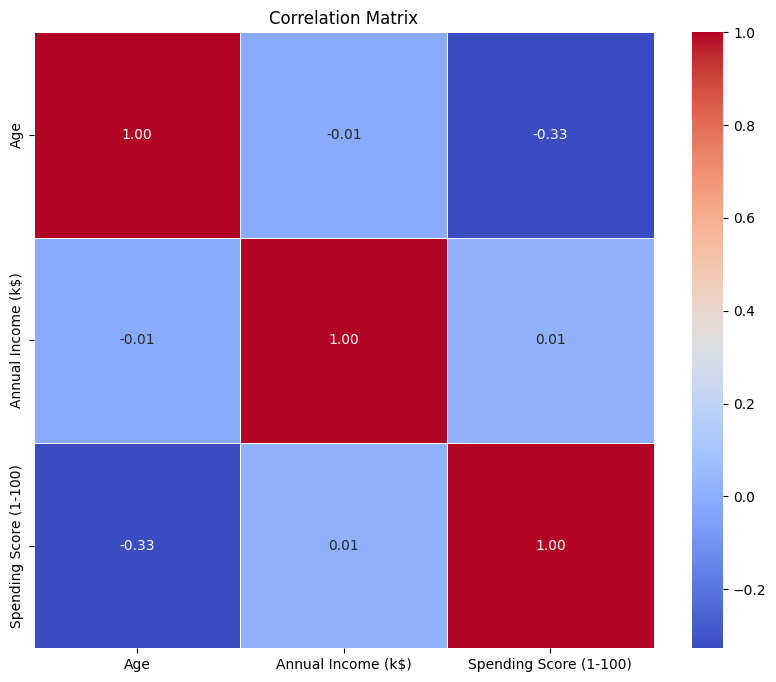

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<BarContainer object of 2 artists>

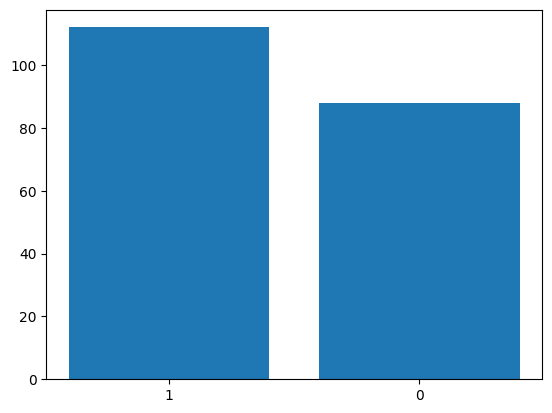

In [15]:
plt.bar(['1','0'], height=dataset.Gender.value_counts())

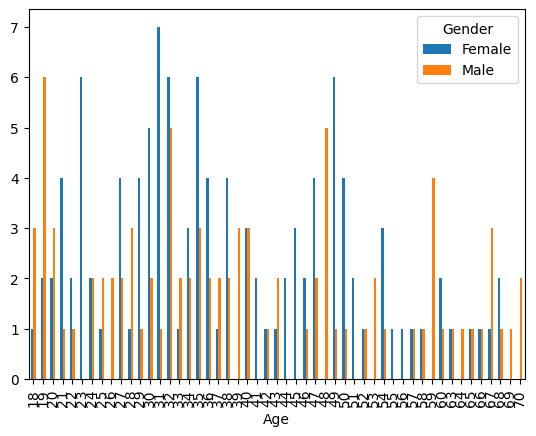

In [16]:
pd.crosstab(dataset.Age, dataset.Gender).plot(kind = "bar")
plt.show()

<Axes: xlabel='Age', ylabel='Gender'>

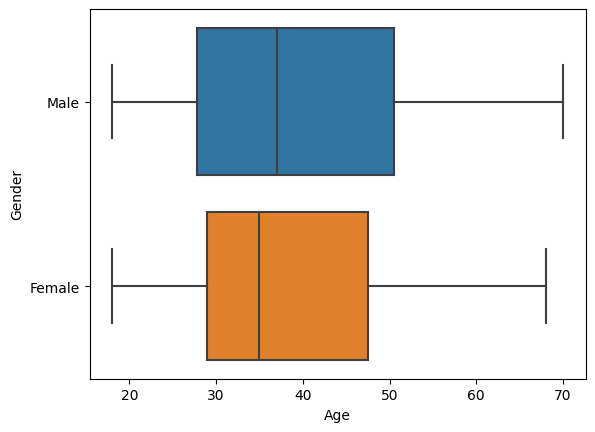

In [17]:
sns.boxplot(x = dataset.Age, y = dataset.Gender, data=dataset)

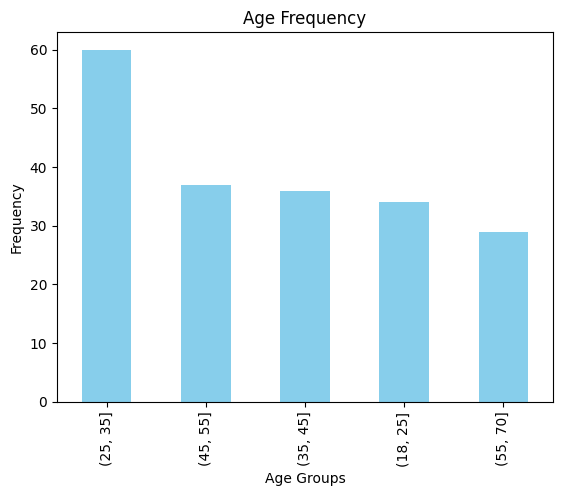

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

bins = [18, 25, 35, 45, 55, 70]

age_groups = pd.cut(dataset['Age'], bins=bins)
age_counts = age_groups.value_counts()

age_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Age Frequency')

plt.show()

In [19]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


KMeans

In [20]:
# Encoding categorical column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

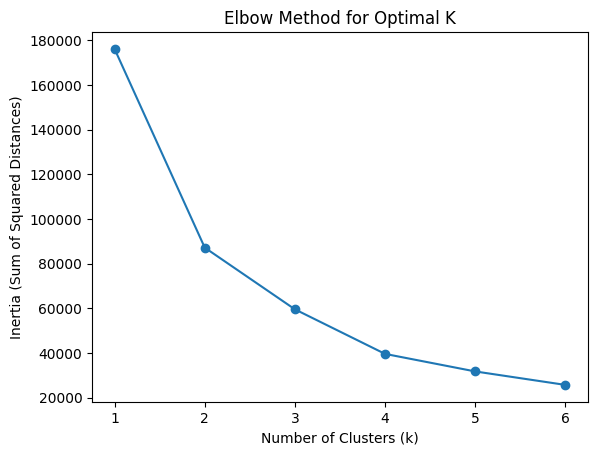

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = dataset.drop('Spending Score (1-100)', axis=1)
y = dataset['Spending Score (1-100)']
K_values = range(1, 7)
inertia_values = []
for k in K_values:
  kmeans= KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)
plt.plot(K_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


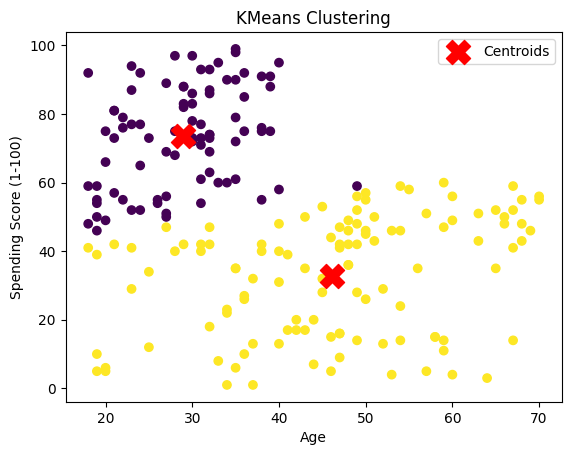

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = dataset[['Age', 'Spending Score (1-100)']]
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features)
dataset['cluster'] = kmeans.labels_
plt.scatter(dataset['Age'], dataset['Spending Score (1-100)'], c=dataset['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()